In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

In [38]:
dataset = pd.read_csv("/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/titanic_train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
dataset.drop(columns=['PassengerId','Name','Ticket', 'Fare', 'Cabin'], inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Part 1: Handling missing values

In [40]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [41]:
dataset.isnull().sum() / len(dataset)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
dtype: float64

In [42]:
len(dataset['Age'].unique())

89

<Axes: >

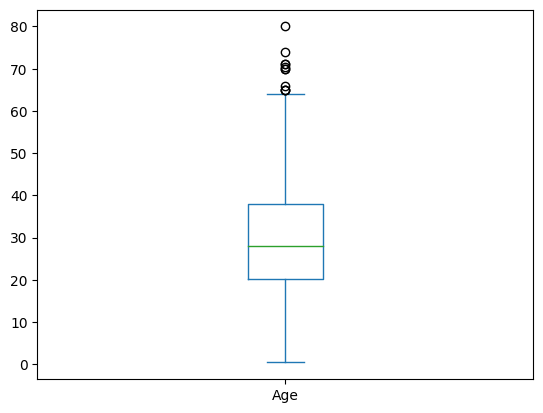

In [43]:
dataset['Age'].plot(kind='box')

In [44]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [45]:
# Need to fix the error

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# imputer.fit(dataset['Age'])
# dataset['Age'] = imputer.transform(dataset['Age'])

In [46]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [47]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
dataset['Embarked'].mode()[0]

'S'

In [49]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

## Part 2: Encoding categorical variables 

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [51]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [52]:
dataset['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
#Label encoding to sex column
dataset['Sex'] = dataset['Sex'].astype('category').cat.codes
dataset['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [54]:
# One hot encoder for Embarked column
dataset = pd.get_dummies(data=dataset, columns=['Embarked'])

In [55]:
dataset.drop(columns=['Embarked_S'], inplace=True)

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int8   
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
dtypes: float64(1), int64(4), int8(1), uint8(2)
memory usage: 37.5 KB


## Part 3: Handling outliers

In [57]:
# for col in [d for d in dataset.columns if d.dtype!=object]:
#     dataset[col].plot(kind='box')
#     plt.show()

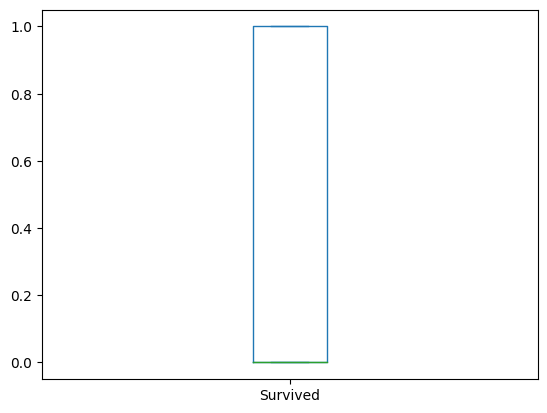

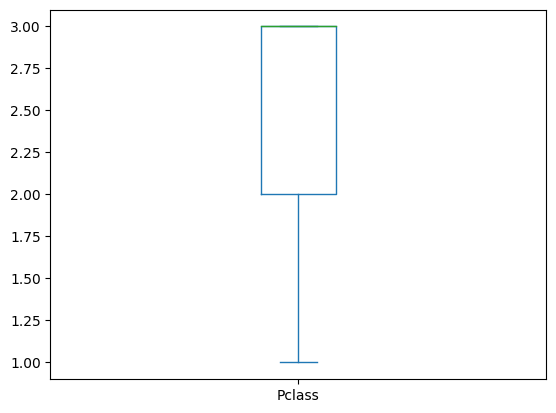

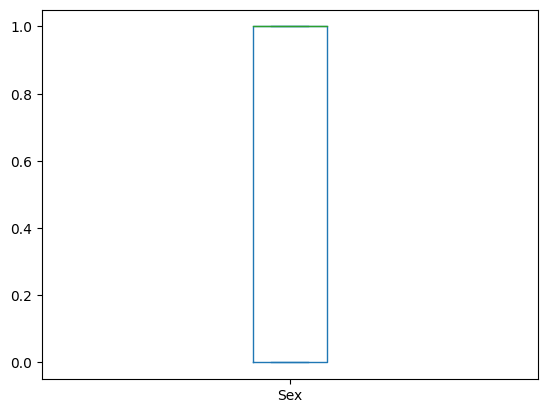

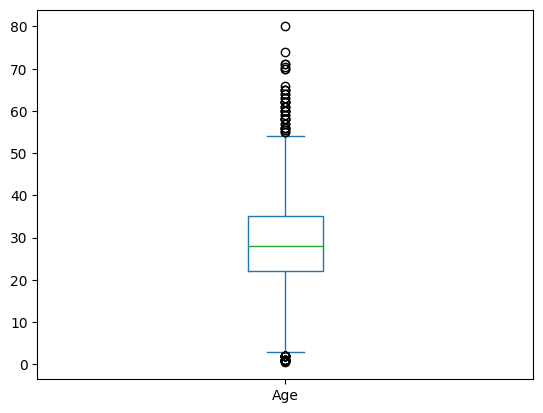

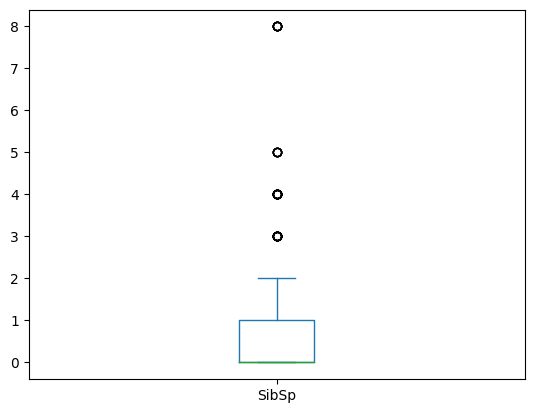

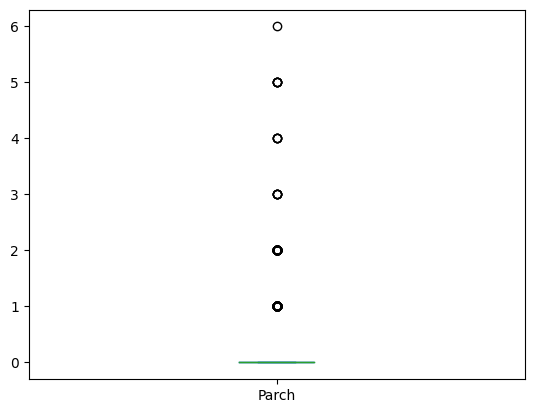

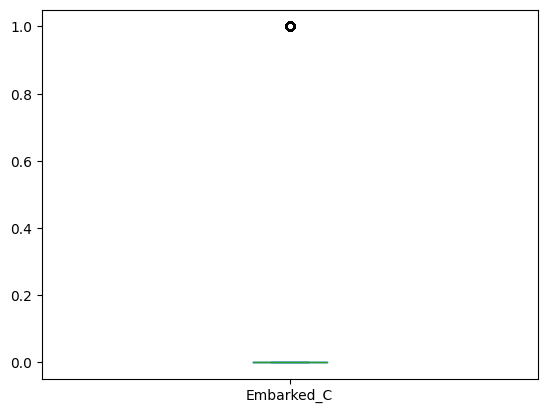

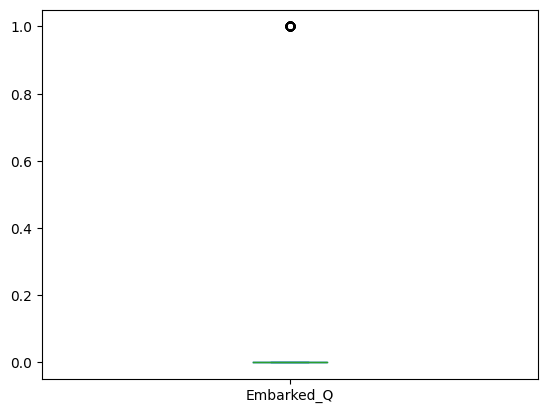

In [58]:
from matplotlib import pyplot as plt

for col in dataset.columns:
    dataset[col].plot(kind='box')
    plt.show()

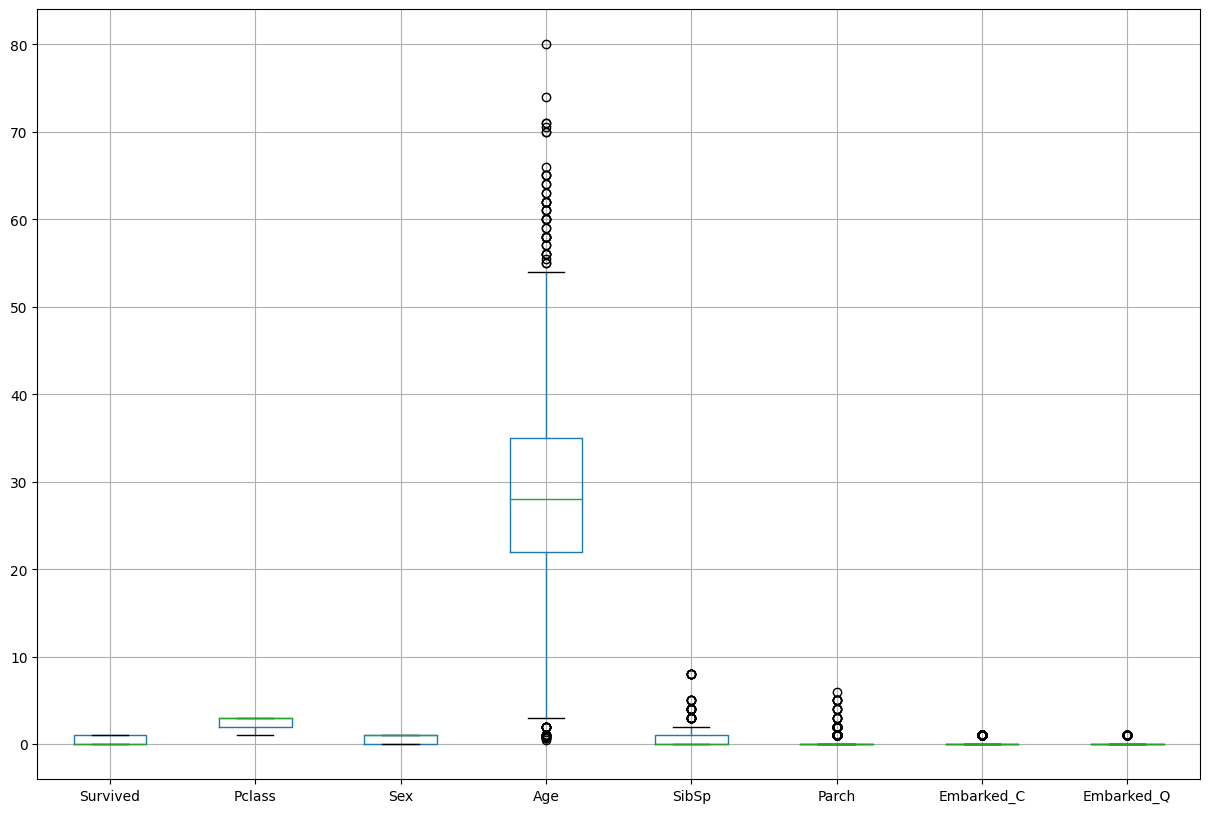

In [59]:
plt.figure(figsize=(15,10))
dataset.boxplot()
plt.show()

In [60]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)
iqr = q3-q1

pos_iqr = q3 + 1.5*iqr
neg_iqr = q1 - 1.5*iqr

In [61]:
print(pos_iqr)
print('************'*5)
print(neg_iqr)

Survived       2.5
Pclass         4.5
Sex            2.5
Age           54.5
SibSp          2.5
Parch          0.0
Embarked_C     0.0
Embarked_Q     0.0
dtype: float64
************************************************************
Survived     -1.5
Pclass        0.5
Sex          -1.5
Age           2.5
SibSp        -1.5
Parch         0.0
Embarked_C    0.0
Embarked_Q    0.0
dtype: float64


In [62]:
q1 = dataset['Age'].quantile(0.25)
q3 = dataset['Age'].quantile(0.75)
iqr = q3-q1

age_upper = q3 + 1.5*iqr
age_lower = q1 - 1.5*iqr

print(age_upper)
print('************'*3)
print(age_lower)

54.5
************************************
2.5


In [63]:
dataset['Age'] = np.where(dataset['Age']>age_upper, age_upper,
                          np.where(dataset['Age']<age_lower, age_lower, 
                                   dataset['Age']))

<Axes: >

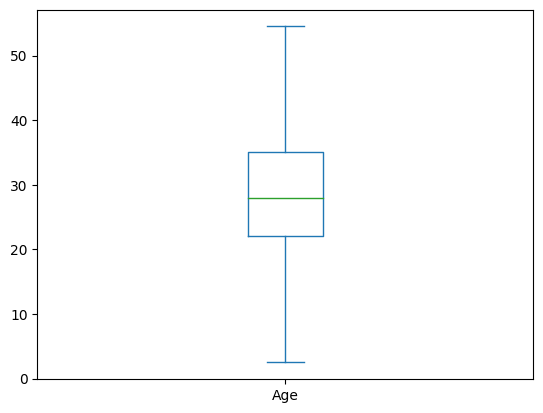

In [64]:
dataset['Age'].plot(kind='box')

## Part 4: Feature scaling
### Tree based algorithms does not require feature scaling

In [65]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,0,0
1,1,1,0,38.0,1,0,1,0
2,1,3,0,26.0,0,0,0,0
3,1,1,0,35.0,1,0,0,0
4,0,3,1,35.0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0,0
887,1,1,0,19.0,0,0,0,0
888,0,3,0,28.0,1,2,0,0
889,1,1,1,26.0,0,0,1,0


## Part 5: Imbalance treatment

In [79]:
from sklearn.preprocessing import StandardScaler

#Splitting into training and test data
x = dataset.iloc[:, dataset.columns!='Survived']
y = dataset['Survived']

sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6
0,0.827377,0.737695,-0.583432,0.432793,-0.473674,-0.482043,-0.307562
1,-1.566107,-1.355574,0.742685,0.432793,-0.473674,2.074505,-0.307562
2,0.827377,-1.355574,-0.251903,-0.474545,-0.473674,-0.482043,-0.307562
3,-1.566107,-1.355574,0.494038,0.432793,-0.473674,-0.482043,-0.307562
4,0.827377,0.737695,0.494038,-0.474545,-0.473674,-0.482043,-0.307562
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.169020,-0.474545,-0.473674,-0.482043,-0.307562
887,-1.566107,-1.355574,-0.832079,-0.474545,-0.473674,-0.482043,-0.307562
888,0.827377,-1.355574,-0.086138,0.432793,2.008933,-0.482043,-0.307562
889,-1.566107,0.737695,-0.251903,-0.474545,-0.473674,2.074505,-0.307562


## Part 6: checking collinearity

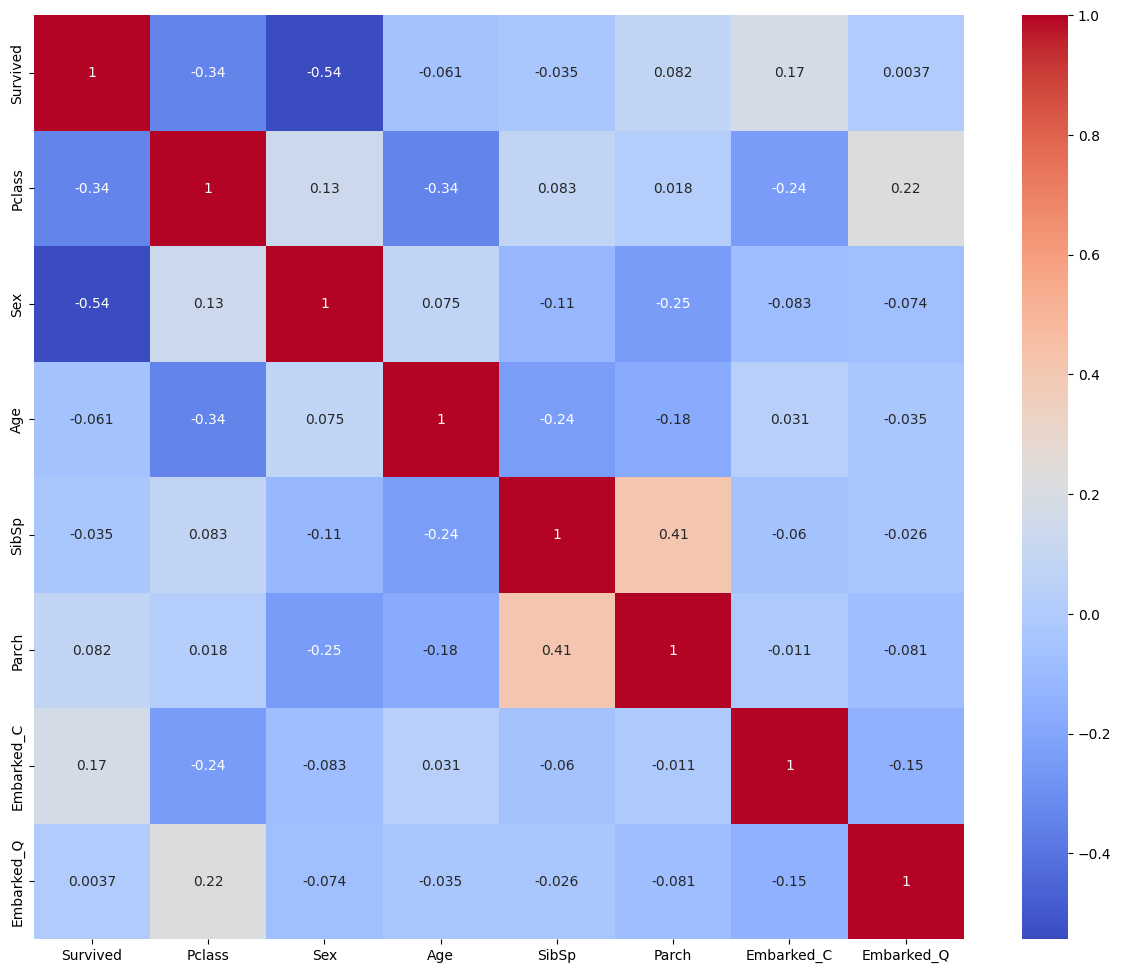

In [81]:
plt.figure(figsize=(15,12))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Part 7: building models

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, train_size=0.25, random_state=50, stratify=y)

In [93]:
from sklearn.svm import SVC

# Kernel = Linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred_train_linear = svm_linear.predict(x_train)
y_pred_test_linear = svm_linear.predict(x_test)

svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train, y_train)
y_pred_train_sigmoid = svm_sigmoid.predict(x_train)
y_pred_test_sigmoid = svm_sigmoid.predict(x_test)

svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)
y_pred_train_poly = svm_poly.predict(x_train)
y_pred_test_poly = svm_poly.predict(x_test)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)
y_pred_train_rbf = svm_rbf.predict(x_train)
y_pred_test_rbf = svm_rbf.predict(x_test)

In [94]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("SVM Linear model")
print('Training accuracy :', accuracy_score(y_train, y_pred_train_linear))
print('Test accuracy :', accuracy_score(y_test, y_pred_test_linear))
print()

print("SVM Sigmoid model")
print('Training accuracy :', accuracy_score(y_train, y_pred_train_sigmoid))
print('Test accuracy :', accuracy_score(y_test, y_pred_test_sigmoid))
print()

print("SVM poly model")
print('Training accuracy :', accuracy_score(y_train, y_pred_train_poly))
print('Test accuracy :', accuracy_score(y_test, y_pred_test_poly))
print()

print("SVM rbf model")
print('Training accuracy :', accuracy_score(y_train, y_pred_train_rbf))
print('Test accuracy :', accuracy_score(y_test, y_pred_test_rbf))
print()

SVM Linear model
Training accuracy : 0.8063063063063063
Test accuracy : 0.7802690582959642

SVM Sigmoid model
Training accuracy : 0.7432432432432432
Test accuracy : 0.7384155455904334

SVM poly model
Training accuracy : 0.8288288288288288
Test accuracy : 0.7817638266068759

SVM rbf model
Training accuracy : 0.8558558558558559
Test accuracy : 0.8146487294469357



### Logistic regression

In [95]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred_train_logit = logit.predict(x_train)
y_pred_test_logit = logit.predict(x_test)

In [96]:
print('Logistic regression')
print('Training accuracy score: ', accuracy_score(y_train, y_pred_train_logit))
print('Training accuracy score: ', accuracy_score(y_test, y_pred_test_logit))


Logistic regression
Training accuracy score:  0.8333333333333334
Training accuracy score:  0.7907324364723468


## Decision tree classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

y_pred_train_dtree = dtree.predict(x_train)
y_pred_test_dtree = dtree.predict(x_test)

print('Decision tree')
print('Training accuracy', accuracy_score(y_train, y_pred_train_dtree ))
print('Testing accuracy', accuracy_score(y_test, y_pred_test_dtree))

Decision tree
Training accuracy 0.9459459459459459
Testing accuracy 0.8086696562032885


## KNN 

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

print('KNN Algorithm')
print('Training accuracy', accuracy_score(y_train, y_pred_train_knn))
print('Testing accuracy', accuracy_score(y_test, y_pred_test_knn))

KNN Algorithm
Training accuracy 0.8468468468468469
Testing accuracy 0.796711509715994


## Using voting method - Hard voting

In [100]:
from sklearn.ensemble import VotingClassifier

estimators = [ ('SVM_Linear', svm_linear), ('SVM_Sigmoid', svm_sigmoid), ('SVM_Poly', svm_poly), 
              ('SVM_RBF', svm_rbf), ('Logistic', logit),
              ('KNN', knn), ('Decision_tree', dtree) ]


voting_hard = VotingClassifier(estimators=estimators, voting='hard')

In [105]:
#Cross valdatoin score
from sklearn.model_selection import cross_val_score

v_train_accuracy = cross_val_score(voting_hard, x_train, y_train, cv=10, scoring='accuracy')
v_test_accuracy = cross_val_score(voting_hard, x_test, y_test, cv=10, scoring='accuracy')

print('Training accuracy', np.round(np.mean(v_train_accuracy),5))
print('Test accuracy', np.round(np.mean(v_test_accuracy),5))


Training accuracy 0.81462
Test accuracy 0.81307


In [112]:
#Accuracy score using voting classifier 2
estimator2 = [ ('SVM_Linear', svm_linear), ('Logistic', logit),
              ('KNN', knn), ('Decision_tree', dtree) ]

voting_hard2 = VotingClassifier(estimators=estimator2, voting='hard')

voting_hard2.fit(x_train, y_train)
y_pred_train_voting = voting_hard2.predict(x_train)
y_pred_test_voting = voting_hard2.predict(x_test)

print('Accuracy scores')
print('Training accuracy', accuracy_score(y_train, y_pred_train_voting))
print('Testing accuracy', accuracy_score(y_test, y_pred_test_voting))
print()

v_train_accuracy2 = cross_val_score(voting_hard2, x_train, y_train, cv=10)
v_test_accuracy2 = cross_val_score(voting_hard2, x_test, y_test, cv=10)

print('Cross validation score')
print('Training validation', np.mean(v_train_accuracy2),5)
print('Testing accuracy', np.mean(v_test_accuracy2),5)

Accuracy scores
Training accuracy 0.8558558558558559
Testing accuracy 0.8026905829596412

Cross validation score
Training validation 0.8235177865612648 5
Testing accuracy 0.8041157847127997 5


## Using voting method - Soft voting

In [113]:
voting_soft = VotingClassifier(estimators=estimators, voting='soft')

v_train_accuracy_soft = cross_val_score(voting_soft, x_train, y_train, cv=10, scoring='accuracy')
v_test_accuracy_soft = cross_val_score(voting_soft, x_test, y_test, cv=10, scoring='accuracy')

print('Training accuracy', np.round(np.mean(v_train_accuracy_soft),5))
print('Test accuracy', np.round(np.mean(v_test_accuracy_soft),5))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           

Training accuracy nan
Test accuracy nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
           